<a href="https://www.kaggle.com/code/gizemkoz/svm-classifier-kernel-trick?scriptVersionId=296935989" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
df = pd.read_csv("/kaggle/input/social-network-ads/Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

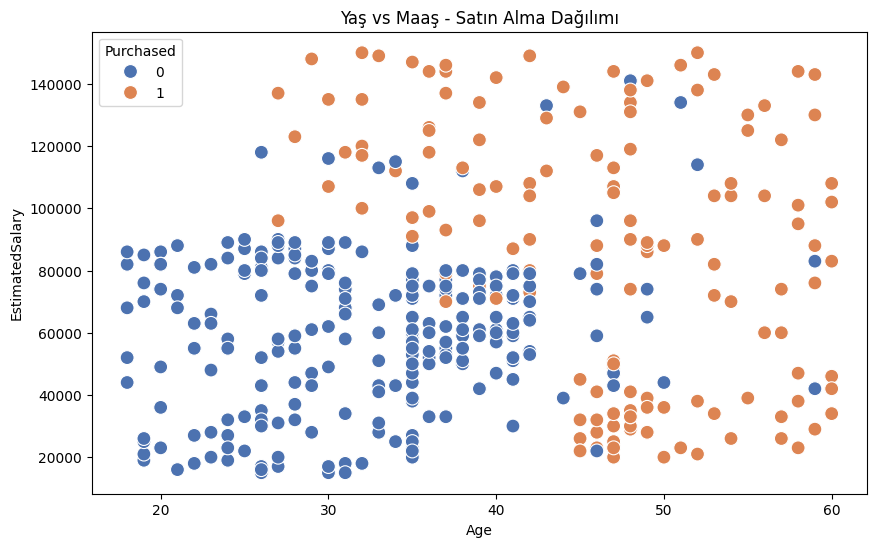

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Grafik Çizimi
sns.scatterplot(
    data=df, 
    x="Age", 
    y="EstimatedSalary", 
    hue="Purchased",     
    palette="deep",      
    s=100
)

plt.title("Yaş vs Maaş - Satın Alma Dağılımı")
plt.show()

In [8]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

## LINEAR KERNEL

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [10]:
svc_linear = SVC(kernel='linear', random_state=42)
svc_linear.fit(X_train_scaled, y_train)
y_pred_lin = svc_linear.predict(X_test_scaled)

print("Classification Report (Linear):")
print(classification_report(y_test, y_pred_lin))

print("Confusion Matrix (Linear):")
cm_lin = confusion_matrix(y_test, y_pred_lin)
print(cm_lin)

Classification Report (Linear):
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100

Confusion Matrix (Linear):
[[61  2]
 [12 25]]


## RBF KERNEL

In [11]:
svc_rbf = SVC(kernel='rbf', random_state=42)
svc_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svc_rbf.predict(X_test_scaled)

print("Classification Report (RBF):")
print(classification_report(y_test, y_pred_rbf))

print("Confusion Matrix (RBF):")
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
print(cm_rbf)

Classification Report (RBF):
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.86      0.97      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100

Confusion Matrix (RBF):
[[57  6]
 [ 1 36]]


## POLY KERNEL

In [12]:
svc_poly = SVC(kernel='poly', random_state=42)
svc_poly.fit(X_train_scaled, y_train)
y_pred_poly = svc_poly.predict(X_test_scaled)

print("Classification Report (POLY):")
print(classification_report(y_test, y_pred_poly))

print("Confusion Matrix (POLY):")
cm_poly = confusion_matrix(y_test, y_pred_poly)
print(cm_poly)

Classification Report (POLY):
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        63
           1       1.00      0.59      0.75        37

    accuracy                           0.85       100
   macro avg       0.90      0.80      0.82       100
weighted avg       0.88      0.85      0.84       100

Confusion Matrix (POLY):
[[63  0]
 [15 22]]


## sigmoid kernel

In [13]:
svc_sigmoid = SVC(kernel='sigmoid', random_state=42)
svc_sigmoid.fit(X_train_scaled, y_train)
y_pred_sigmoid = svc_sigmoid.predict(X_test_scaled)

print("Classification Report (sigmoid):")
print(classification_report(y_test, y_pred_sigmoid))

print("Confusion Matrix (sigmoid):")
cm_sigmoid = confusion_matrix(y_test, y_pred_poly)
print(cm_sigmoid)

Classification Report (sigmoid):
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        63
           1       0.62      0.57      0.59        37

    accuracy                           0.71       100
   macro avg       0.69      0.68      0.68       100
weighted avg       0.71      0.71      0.71       100

Confusion Matrix (sigmoid):
[[63  0]
 [15 22]]


## HYPERPARAMETER TUNING

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid={
    "C" : [0.1,1,10,100,1000],
    "kernel" : ["rbf"],
    "gamma":["scale","auto"]
}

grid = GridSearchCV(estimator = SVC(), param_grid=param_grid, cv = 5)

grid.fit(X_train_scaled,y_train)

grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [15]:
y_best=grid.predict(X_test_scaled)
print(classification_report(y_best,y_test))
print(confusion_matrix(y_best,y_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        58
           1       0.97      0.86      0.91        42

    accuracy                           0.93       100
   macro avg       0.94      0.92      0.93       100
weighted avg       0.93      0.93      0.93       100

[[57  1]
 [ 6 36]]


In [16]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

### SVM KERNEL TRICK - manuel rbf kernel

In [17]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe" # Render ayarı 

df["Purchased_Str"] = df["Purchased"].astype(str)

#Polinom sütun oluşturma
df["Age2"] = df["Age"] ** 2
df["EstimatedSalary2"] = df["EstimatedSalary"] ** 2
df["Age_Salary_Interaction"] = df["Age"] * df["EstimatedSalary"] # Yaş ile Maaşın Çarpımı

In [18]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Purchased_Str,Age2,EstimatedSalary2,Age_Salary_Interaction
0,15624510,Male,19,19000,0,0,361,361000000,361000
1,15810944,Male,35,20000,0,0,1225,400000000,700000
2,15668575,Female,26,43000,0,0,676,1849000000,1118000
3,15603246,Female,27,57000,0,0,729,3249000000,1539000
4,15804002,Male,19,76000,0,0,361,5776000000,1444000


In [19]:
# 3D Grafik Çizimi
fig = px.scatter_3d(
    df, 
    x="Age2",                      # X Ekseni: Yaşın Karesi
    y="EstimatedSalary2",          # Y Ekseni: Maaşın Karesi
    z="Age_Salary_Interaction",    # Z Ekseni: Yaş x Maaş
    color="Purchased_Str",         # Renk: Satın Alma Durumu
    title="SVM Kernel Trick: Yaş ve Maaşın 3D Dönüşümü",
    labels={
        "Age2": "Yaş Kare",
        "EstimatedSalary2": "Maaş Kare",
        "Age_Salary_Interaction": "Yaş x Maaş Etkileşimi",
        "Purchased_Str": "Satın Alma (0/1)"
    },
    opacity=0.7 # Noktalar şeffaf olsun
)
fig.update_traces(marker=dict(size=8)) #noktaları büyütelim
fig.show()

In [20]:
# MANUEL ÖZELLİK MÜHENDİSLİĞİ (Feature Engineering)
# Verinin geometrisini (3D) kendimiz oluşturuyoruz
X_3d = df[['Age', 'EstimatedSalary']].copy()
X_3d['Age2'] = df['Age'] ** 2
X_3d['Salary2'] = df['EstimatedSalary'] ** 2
X_3d['Interaction'] = df['Age'] * df['EstimatedSalary']

# Hedef değişken
y = df['Purchased']

# BÖLME VE ÖLÇEKLENDİRME
X_train_3d, X_test_3d, y_train, y_test = train_test_split(X_3d, y, test_size=0.25, random_state=42)

# Ölçeklendirme
sc = StandardScaler()
X_train_3d = sc.fit_transform(X_train_3d)
X_test_3d = sc.transform(X_test_3d)

# HİPERPARAMETRE OPTİMİZASYONU (GridSearchCV)
# Linear kernel kullanacağız ama "C" değerini optimize edeceğiz.
# C: Hata toleransı (Küçük C: Geniş sınır, Büyük C: Katı sınır)
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Model Kurulumu (Kernel='linear' sabit, C değişken)
grid_linear = GridSearchCV(
    estimator=SVC(kernel="linear", random_state=42),
    param_grid=param_grid,
    cv=5,                 # 5 katlı çapraz doğrulama (sağlama yapar)
    scoring='accuracy',   # Başarı kriteri
    verbose=1             # İşlem detaylarını yazdır
)

# Eğitimi Başlat
grid_linear.fit(X_train_3d, y_train)

# SONUÇLARI RAPORLAMA
print(f"\nBulunan En İyi Parametre: {grid_linear.best_params_}")
print(f"Eğitim Seti En İyi Skoru: {grid_linear.best_score_:.4f}")

# En iyi modelle Test Seti üzerinde tahmin yapalım
y_pred_optimized = grid_linear.predict(X_test_3d)

print("\n 3D DÖNÜŞTÜRÜLMÜŞ + OPTİMİZE EDİLMİŞ SONUÇLAR")
print(classification_report(y_test, y_pred_optimized))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimized))

Fitting 5 folds for each of 7 candidates, totalling 35 fits

Bulunan En İyi Parametre: {'C': 10}
Eğitim Seti En İyi Skoru: 0.8833

 3D DÖNÜŞTÜRÜLMÜŞ + OPTİMİZE EDİLMİŞ SONUÇLAR
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.90      0.95      0.92        37

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

Confusion Matrix:
[[59  4]
 [ 2 35]]


#### **Better features beat better algorithms.**